# About Dataset
## Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

## Content
price price in US dollars 326--18,823

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

        ("cut_cat", OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]), ['cut']),
        ("color_cat", OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']]), ['color']),
        ("clarity_cat", OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), ['clarity']),

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
X_train = pd.read_csv("https://raw.githubusercontent.com/Khalidallam222/SHAI-Khalid-Allam/main/Task%207%3A%20end%20to%20end%20ML%20Project/train.csv")
X_sub = pd.read_csv("https://raw.githubusercontent.com/Khalidallam222/SHAI-Khalid-Allam/main/Task%207%3A%20end%20to%20end%20ML%20Project/test.csv")

In [2]:
X_train.drop('Id', axis=1, inplace=True)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


# Utilities

In [ ]:
def winsorize(df, feature_name, lower_bound=None, upper_bound=None):
  """
  Winsorizes outliers in a feature by replacing them with nearest non-outlier values.

  Args:
      df (pandas.DataFrame): The DataFrame containing the feature.
      feature_name (str): The name of the feature column.
      lower_bound (float, optional): The lower bound for outlier replacement. Defaults to None (calculated from IQR).
      upper_bound (float, optional): The upper bound for outlier replacement. Defaults to None (calculated from IQR).

  Returns:
      pandas.DataFrame: The DataFrame with outliers winsorized.
  """
  if lower_bound is None or upper_bound is None:
    Q1 = df[feature_name].quantile(0.25)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR) if lower_bound is None else lower_bound
    upper_bound = Q3 + (1.5 * IQR) if upper_bound is None else upper_bound
  df.loc[df[feature_name] < lower_bound, feature_name] = lower_bound
  df.loc[df[feature_name] > upper_bound, feature_name] = upper_bound
  return df

# Winsorize outliers in the 'table' feature (assuming you want to use IQR for bounds)
# X_train_filtered = winsorize(X_train.copy(), 'table')

# Now 'X_train_filtered' contains your data with outliers in 'table' winsorized

# Alternatively, specify custom bounds (optional)
# lower_bound = ...  # Define a specific value for the lower bound
# upper_bound = ...  # Define a specific value for the upper bound
# X_train_filtered = winsorize(X_train.copy(), 'table', lower_bound, upper_bound)


In [ ]:
import pandas as pd

def remove_outliers_iqr(df, feature_name, thresh=1.5):
  """
  Removes outliers from a feature using IQR (Interquartile Range).

  Args:
      df (pandas.DataFrame): The DataFrame containing the feature.
      feature_name (str): The name of the feature column.
      thresh (float, optional): The multiplier for IQR to define outlier threshold. Defaults to 1.5.

  Returns:
      pandas.DataFrame: The DataFrame with outliers removed.
  """
  Q1 = df[feature_name].quantile(0.25)
  Q3 = df[feature_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (thresh * IQR)
  upper_bound = Q3 + (thresh * IQR)
  return df[(df[feature_name] >= lower_bound) & (df[feature_name] <= upper_bound)]


In [ ]:
from sklearn.preprocessing import StandardScaler

def scale_columns(df, columns):
  """
  Applies StandardScaler to specified columns in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing the features.
      columns (list): A list of column names to be scaled.

  Returns:
      pandas.DataFrame: The DataFrame with scaled columns.
      StandardScaler: The fitted StandardScaler object (optional).
  """
  scaler = StandardScaler()
  scaled_df = df.copy()
  scaled_df[columns] = scaler.fit_transform(df[columns])
  return scaled_df, scaler  # Optional to return the scaler object

# # Example usage
# df = pd.DataFrame({'col1': [1, 2, 3], 'col2': [10, 20, 30], 'col3': ['a', 'b', 'c']})
# scaled_df, scaler = scale_columns(df, ['col1', 'col2'])
# print(scaled_df)


# Correlation Matrix

In [3]:
X_train.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


As you can see there a strong correlation between price and carat, x, y, z

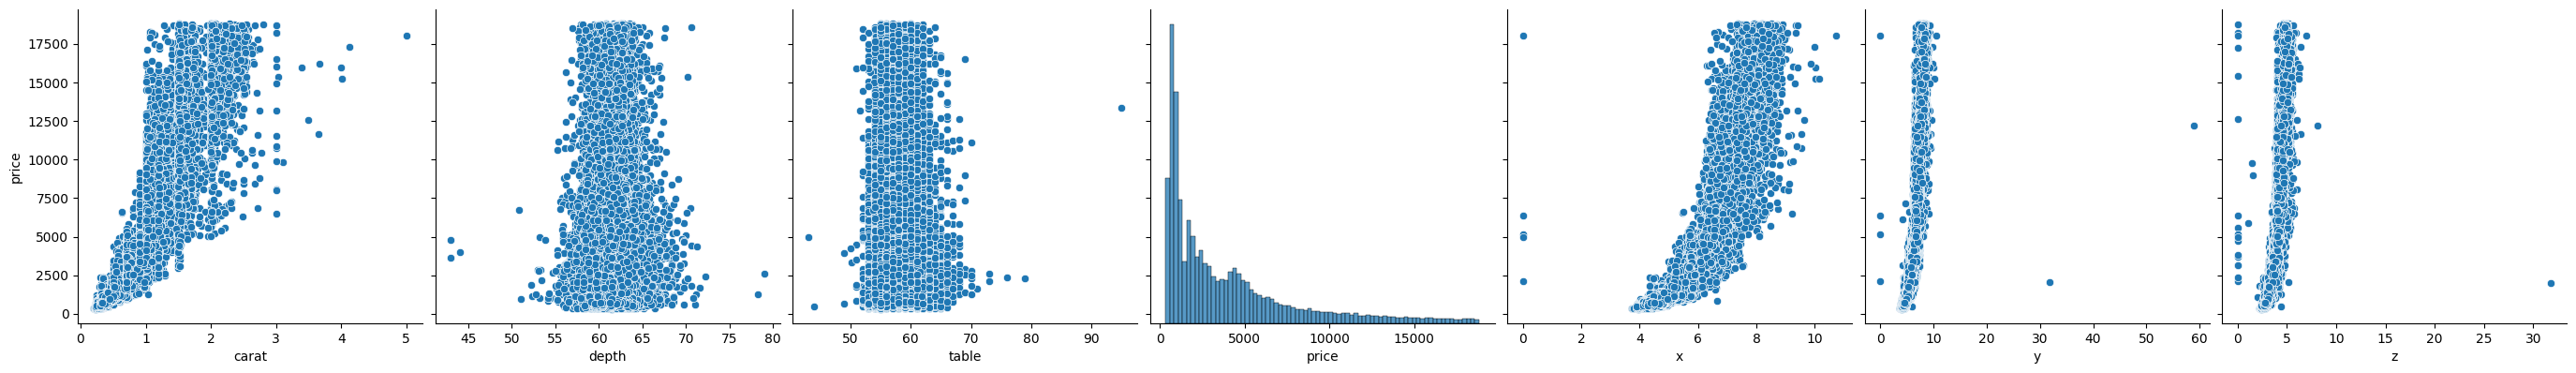

In [4]:
sns.pairplot(data=X_train, y_vars='price', diag_kind='hist', height=(4))

# Carat Feature

## some outliers
        ("cut_cat", OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]), ['cut']),
        ("color_cat", OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']]), ['color']),
        ("clarity_cat", OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), ['clarity']),

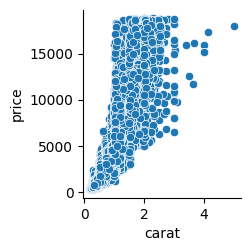

In [5]:
sns.pairplot(data=X_train, y_vars='price', x_vars='carat')

In [6]:
X_train[X_train['carat'] >= 3].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
39490,3.00,Very Good,H,I1,63.1,55.0,6512,9.23,9.10,5.77
23004,3.01,Premium,I,I1,62.7,58.0,8040,9.10,8.97,5.67
22788,3.00,Fair,H,I1,67.1,57.0,8044,8.93,8.84,5.97
20984,3.11,Fair,J,I1,65.9,57.0,9823,9.15,9.02,5.98
35076,3.01,Premium,F,I1,62.2,56.0,9925,9.24,9.13,5.73
8689,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31
9927,3.00,Good,I,I1,57.0,64.0,10863,9.38,9.31,5.33
26229,3.00,Good,E,I1,64.2,65.0,11548,9.08,8.96,5.79
16302,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
12566,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03


If you look at the previous data you will notice some unlogical data (look at the first two rows) 

Q1: 0.4 Q2: 0.7 Q3: 1.04


<Axes: ylabel='carat'>

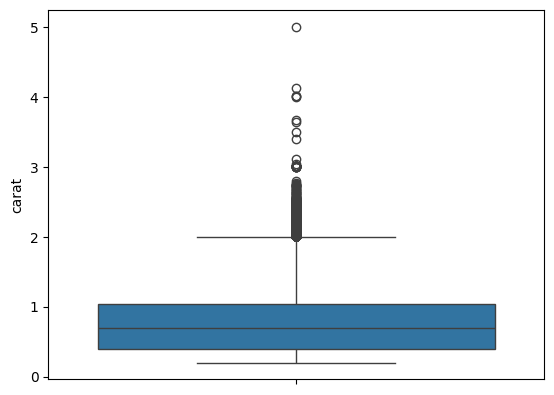

In [7]:
feature_name = 'carat'
Q1 = X_train[feature_name].quantile(0.25)
Q2 = X_train[feature_name].quantile(0.50)
Q3 = X_train[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train, y=feature_name)


In [ ]:
X_train_filtered = winsorize(X_train.copy(), 'carat', lower_bound=0.4 ,upper_bound=4)

In [ ]:
sns.pairplot(data=X_train_filtered, hue='cut', y_vars='carat', diag_kind='hist')

# Depth Feature

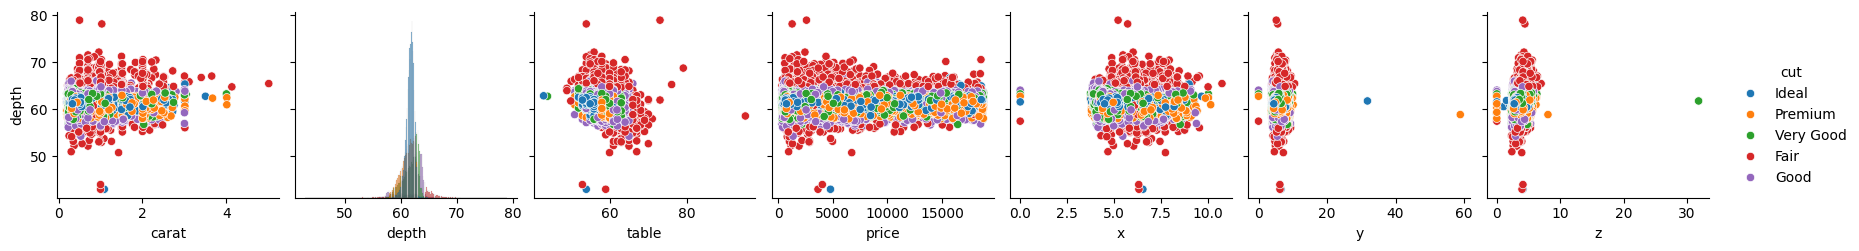

In [9]:
sns.pairplot(data=X_train, hue='cut', y_vars='depth', diag_kind='hist')

As you can see the depth column don't affect the price and have almost a zero correlation so we can delete this column 

Q1: 61.0 Q2: 61.8 Q3: 62.5


<Axes: ylabel='depth'>

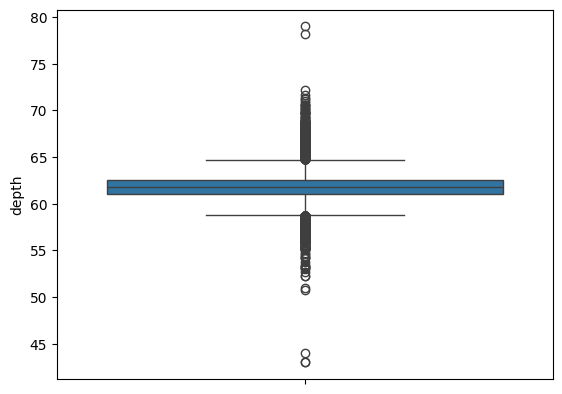

In [10]:
feature_name = 'depth'
Q1 = X_train[feature_name].quantile(0.25)
Q2 = X_train[feature_name].quantile(0.50)
Q3 = X_train[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train, y=feature_name)


In [ ]:
X_train_filtered = winsorize(X_train.copy(), 'depth', lower_bound=50 ,upper_bound=72)

In [ ]:
sns.pairplot(data=X_train_filtered, hue='cut', y_vars='depth', diag_kind='hist')

# Table Feature

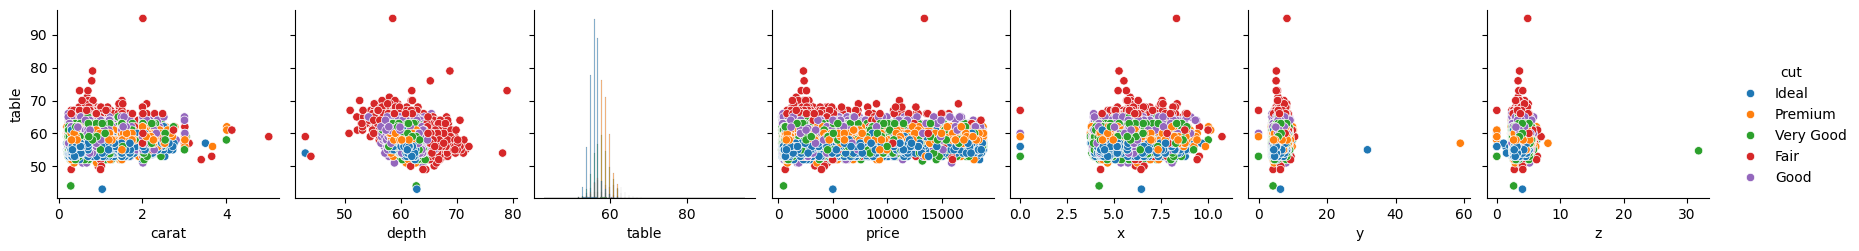

In [11]:
sns.pairplot(data=X_train, hue='cut', y_vars='table', diag_kind='hist')

the table feature doesn't affect the price and it depends on the cut feature so we can delete it

Q1: 56.0 Q2: 57.0 Q3: 59.0


<Axes: ylabel='table'>

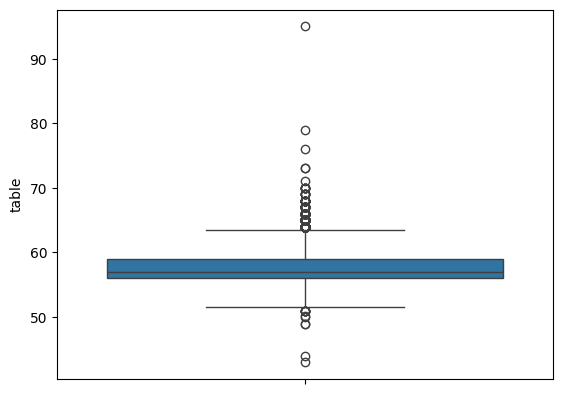

In [12]:
feature_name = 'table'
Q1 = X_train[feature_name].quantile(0.25)
Q2 = X_train[feature_name].quantile(0.50)
Q3 = X_train[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train, y=feature_name)

In [ ]:
X_train_filtered = winsorize(X_train.copy(), 'table', upper_bound=80)

In [ ]:
sns.pairplot(data=X_train_filtered, hue='cut', y_vars='table', diag_kind='hist')

# X, Y, Z Features

## X Feature

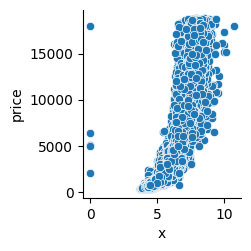

In [13]:
sns.pairplot(data=X_train, y_vars='price', x_vars='x')

In [14]:
X_train[X_train['x'] < 3].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
39201,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
22171,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
1221,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24901,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0


You will have to remove zero x

In [ ]:
feature_name = 'x'
Q1 = X_train[feature_name].quantile(0.25)
Q2 = X_train[feature_name].quantile(0.50)
Q3 = X_train[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train, y=feature_name)

In [ ]:
X_train_filtered = winsorize(X_train.copy(), 'x', lower_bound=4)

In [ ]:
sns.pairplot(data=X_train_filtered, hue='cut', y_vars='x', diag_kind='hist')


## Y Feature

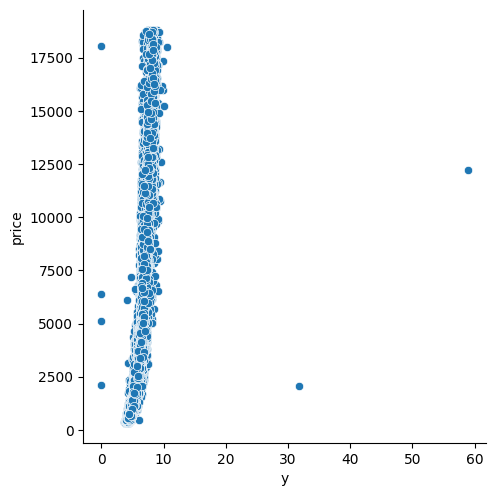

In [15]:
sns.pairplot(data=X_train, y_vars='price', x_vars='y', height=5)

In [16]:
X_train[(X_train['y'] < 0.5) | (X_train['y'] > 20)].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
40663,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.0,0.00
22171,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.0,0.00
1221,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.0,0.00
35359,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
24901,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.0,0.00


Notice the y>20 or y<0.5 they are unlogical in prices

Q1: 4.72 Q2: 5.71 Q3: 6.54


<Axes: ylabel='y'>

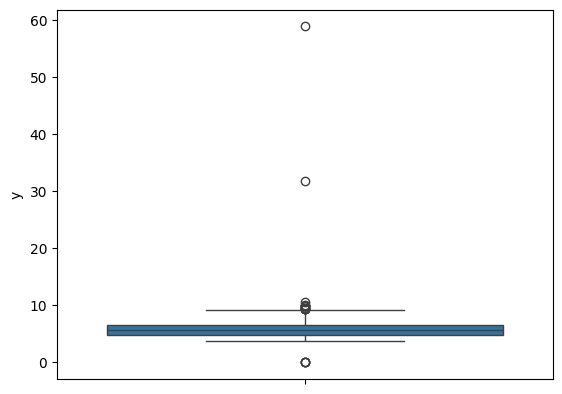

In [17]:
feature_name = 'y'
Q1 = X_train[feature_name].quantile(0.25)
Q2 = X_train[feature_name].quantile(0.50)
Q3 = X_train[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train, y=feature_name)

In [ ]:
X_train_filtered = winsorize(X_train.copy(), 'y', lower_bound=4)

In [ ]:
sns.pairplot(data=X_train_filtered, hue='cut', y_vars='y', diag_kind='hist')

## Z Feature

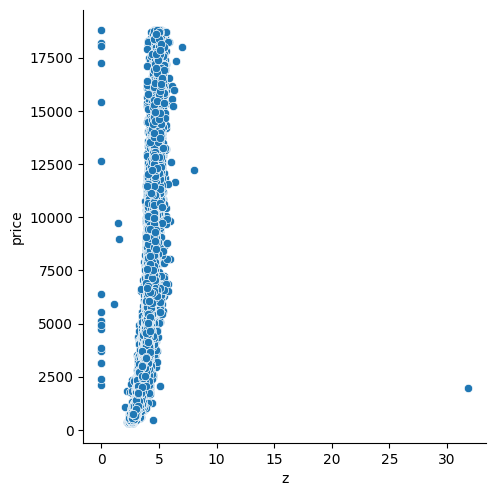

In [18]:
sns.pairplot(data=X_train, y_vars='price', x_vars='z', height=5)

In [19]:
X_train[(X_train['z'] < 1.55) | (X_train['z'] > 6)].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
10541,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
27221,1.12,Premium,G,I1,60.4,59.0,2383,6.71,6.67,0.00
16971,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00
34065,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00
571,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00
14265,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00
4980,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00
39201,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
22171,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00


Q1: 2.91 Q2: 3.53 Q3: 4.04


<Axes: ylabel='z'>

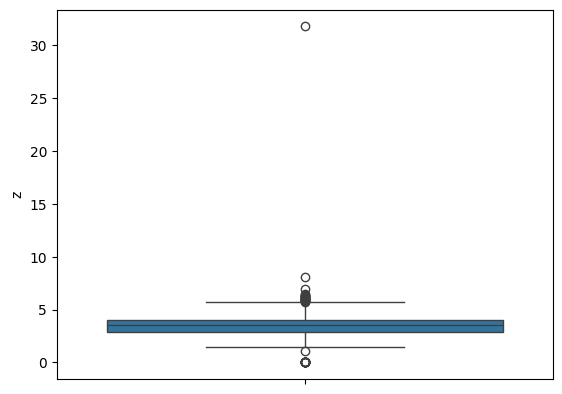

In [20]:
feature_name = 'z'
Q1 = X_train[feature_name].quantile(0.25)
Q2 = X_train[feature_name].quantile(0.50)
Q3 = X_train[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train, y=feature_name)

In [ ]:
X_train_filtered = winsorize(X_train.copy(), 'z', lower_bound=2)

In [ ]:
sns.pairplot(data=X_train_filtered, hue='cut', y_vars='z', diag_kind='hist')

# Extra Volume Feature with caping outliers

In [ ]:
# X_train_filtered = winsorize(X_train.copy(), 'x', lower_bound=4)
# X_train_filtered = winsorize(X_train_filtered.copy(), 'y', lower_bound=4)
# X_train_filtered = winsorize(X_train_filtered.copy(), 'z')
# X_train_filtered['volume'] = X_train_filtered['x'] * X_train_filtered['y'] * X_train_filtered['z']
# # X_train_filtered["volume"] = X_train_filtered["volume"].apply(np.log1p)
# X_train_filtered = winsorize(X_train_filtered, 'carat', lower_bound=0.4 ,upper_bound=4)
# X_train_filtered = winsorize(X_train_filtered, 'depth', lower_bound=50 ,upper_bound=72)
# X_train_filtered = winsorize(X_train_filtered, 'table', upper_bound=80)

# sns.pairplot(data=X_train_filtered, hue='cut', diag_kind='hist')

# Dropping outliers


In [21]:
X_train_filtered = X_train.copy()
X_train_filtered = X_train_filtered[X_train_filtered['x'] >= 3 ]
X_train_filtered = X_train_filtered[(X_train_filtered['y'] >= 0.5) & (X_train_filtered['y'] <= 20)]
X_train_filtered = X_train_filtered[(X_train_filtered['z'] >= 1.55) & (X_train_filtered['z'] <= 6)]
X_train_filtered = X_train_filtered[X_train_filtered['carat'] < 3]

# sns.pairplot(data=X_train_filtered, hue='cut', diag_kind='hist')


# removing Outliers automatically
# X_train_filtered = X_train.copy()
# X_train_filtered = X_train.select_dtypes(include=np.number).copy()
# from sklearn.ensemble import IsolationForest
# isolation_forest = IsolationForest(random_state=42)
# outlier_pred = isolation_forest.fit_predict(X_train_filtered)
# X_train_filtered = X_train_filtered.iloc[outlier_pred == 1]
# sns.pairplot(data=X_train_filtered, diag_kind='hist')

In [22]:
X_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43101 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43101 non-null  float64
 1   cut      43101 non-null  object 
 2   color    43101 non-null  object 
 3   clarity  43101 non-null  object 
 4   depth    43101 non-null  float64
 5   table    43101 non-null  float64
 6   price    43101 non-null  int64  
 7   x        43101 non-null  float64
 8   y        43101 non-null  float64
 9   z        43101 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


# Pipeline

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline, Pipeline

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    )
# Function to drop 'table' and 'depth' columns
def drop_table_depth(X):
    return X.drop(X.columns ,axis=1)

def drop_feature_names_out(function_transformer, feature_names_in):
    return []  # feature names out

preprocessing = ColumnTransformer([
        # ("drop_table_depth", FunctionTransformer(drop_table_depth, feature_names_out=drop_feature_names_out), ['table', 'depth']),
        ("cut_cat", OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]), ['cut']),
        ("color_cat", OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']]), ['color']),
        ("clarity_cat", OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), ['clarity']),
    ],
    remainder=StandardScaler()
    # remainder='passthrough'
) 

# Model

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_filtered.drop(['price'], axis=1), X_train_filtered['price'], test_size=0.2, random_state=42)       

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

clf=make_pipeline(preprocessing, RandomForestRegressor(max_depth=60, max_features=4, n_estimators=960))
clf_rmses = -cross_val_score(clf, X_train, y_train,
                                scoring="neg_root_mean_squared_error", cv=3)

pd.Series(clf_rmses).describe()

count      3.000000
mean     555.931930
std        3.469975
min      552.309731
25%      554.284679
50%      556.259627
75%      557.743029
max      559.226432
dtype: float64

In [26]:
clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('cut_cat',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal']]),
                                                  ['cut']),
                                                 ('color_cat',
                                                  OrdinalEncoder(categories=[['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D']]),
                                                  ['color']),
                                                 ('clarity_cat',
                                                  OrdinalEncoder(categories=[['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']]),
                                                  ['clarity'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=60, max_features=4,
                                       n_estimators=960))])

In [27]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = clf.predict(X_train)

print(r2_score(y_train, y_pred), np.sqrt(mean_squared_error(y_train, y_pred)))

0.9975193447370484 198.31157811931718


In [28]:
y_pred = clf.predict(X_test)
print(r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

0.9811572125010589 541.8144006050115


In [29]:
feature_importances = clf['randomforestregressor'].feature_importances_
sorted(zip(feature_importances,
           clf["columntransformer"].get_feature_names_out()),
           reverse=True)

[(0.3362090181824126, 'remainder__y'),
 (0.3096210347499098, 'remainder__carat'),
 (0.17483833572886384, 'remainder__x'),
 (0.07593390817582726, 'remainder__z'),
 (0.061160785472607164, 'clarity_cat__clarity'),
 (0.031744236242112124, 'color_cat__color'),
 (0.004722461104275115, 'remainder__depth'),
 (0.0030512892221475616, 'remainder__table'),
 (0.0027189311218444655, 'cut_cat__cut')]

# Feature selection on importance and train again

In [30]:
from sklearn.feature_selection import SelectFromModel

# Create a SelectFromModel instance
selector = SelectFromModel(RandomForestRegressor(max_depth=60, max_features=4, n_estimators=960), threshold=0.002)  # Features with importance greater than the mean importance will be selected
clf=make_pipeline(preprocessing, selector, RandomForestRegressor())

# Fit the data
clf.fit(X_train, y_train)

# # # # Transform the data to select the most important features
# # # X_selected = clf.transform(X_train)

y_pred = clf.predict(X_train)
print(r2_score(y_train, y_pred), np.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = clf.predict(X_test)
print(r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

0.9973951726684347 203.21433172743355
0.980656818194139 548.9615480856768


In [ ]:
clf.get_params

# Fine Tune

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# Define the parameter grid for RandomizedSearchCV
param_distribs = {
    'randomforestregressor__n_estimators': randint(100, 1000),
    'randomforestregressor__max_features': randint(1, 11),
    'randomforestregressor__max_depth': randint(5, 50),
    'randomforestregressor__min_samples_split': randint(2, 20),
    'randomforestregressor__min_samples_leaf': randint(1, 10),
    'randomforestregressor__bootstrap': [True, False]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    clf, param_distributions=param_distribs, n_iter=50,
    scoring="neg_root_mean_squared_error", cv=5, random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train_filtered.drop(['price'], axis=1), X_train_filtered['price'])

# Get the best model
best_model = random_search.best_estimator_

In [ ]:
# Evaluate on the training set
clf_rmses = -cross_val_score(best_model, X_train_filtered.drop(['price'], axis=1), X_train_filtered['price'],
                                scoring="neg_root_mean_squared_error", cv=3)

pd.Series(clf_rmses).describe()

# Train on the overall training data

In [31]:
clf.fit(X_train_filtered.drop(['price'], axis=1), X_train_filtered['price'])

# # Transform the data to select the most important features
# X_selected = clf.transform(X_train)

y_pred = clf.predict(X_train_filtered.drop(['price'], axis=1))

print(r2_score(X_train_filtered['price'], y_pred), np.sqrt(mean_squared_error(X_train_filtered['price'], y_pred)))

0.9974524504932869 200.62153765900695


In [32]:
clf_rmses = -cross_val_score(clf, X_train_filtered.drop(['price'], axis=1), X_train_filtered['price'],
                                scoring="neg_root_mean_squared_error", cv=3)

pd.Series(clf_rmses).describe()

count      3.000000
mean     552.018804
std        9.587374
min      545.602408
25%      546.508296
50%      547.414184
75%      555.227002
max      563.039821
dtype: float64

# Submit

In [36]:
pred = clf.predict(X_sub.drop(["Id"], axis=1))

submit = pd.DataFrame(data={"Id": X_sub["Id"].astype(np.int64), "price": pred})
submit.info()
submit.to_csv("/workspaces/codespaces-jupyter/data/submission.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      10788 non-null  int64  
 1   price   10788 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 168.7 KB
